# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

560

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create URL for API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


In [4]:
# List for holding data
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []
index_count = 0
set_count = 1


In [5]:
# Print the list header
print("Beginning Data Retrieval ")
print("-----------------------------")

# Loop through for weather data for cities
for index, city in enumerate(cities, start = 1):
    
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response['main']['temp_max'])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        
        # Start new set when it hits 50
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        # Format for printing the list of cities
        print(f"Processing Record {index_count} of Set {set_count} | {city}") 
  
    # Catch for the cities that dont have data in API
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | hermanus
City not found. Skipping...
Processing Record 3 of Set 1 | chuy
City not found. Skipping...
Processing Record 4 of Set 1 | sioux lookout
Processing Record 5 of Set 1 | fort nelson
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | verkhoyansk
Processing Record 9 of Set 1 | coahuayana
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | jardim
Processing Record 12 of Set 1 | narsaq
City not found. Skipping...
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | machacamarca
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | llangefni
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | iquitos
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | luanda
Proces

Processing Record 30 of Set 4 | innisfail
Processing Record 31 of Set 4 | stephenville
Processing Record 32 of Set 4 | te anau
Processing Record 33 of Set 4 | bathsheba
Processing Record 34 of Set 4 | peterhead
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | puerto ayora
Processing Record 37 of Set 4 | cayenne
Processing Record 38 of Set 4 | liverpool
Processing Record 39 of Set 4 | adre
Processing Record 40 of Set 4 | mehamn
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | labuhan
Processing Record 43 of Set 4 | tongren
Processing Record 44 of Set 4 | baherden
City not found. Skipping...
Processing Record 45 of Set 4 | la serena
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | bodmin
Processing Record 48 of Set 4 | leshukonskoye
Processing Record 49 of Set 4 | roald
Processing Record 50 of Set 4 | hovd
City not found. Skipping...
Processing Record 0 of Se

Processing Record 9 of Set 8 | yerbogachen
Processing Record 10 of Set 8 | panaba
Processing Record 11 of Set 8 | sinnamary
Processing Record 12 of Set 8 | kalakamati
Processing Record 13 of Set 8 | tostedt
Processing Record 14 of Set 8 | sunnyside
Processing Record 15 of Set 8 | saint-denis
Processing Record 16 of Set 8 | cockburn town
Processing Record 17 of Set 8 | batticaloa
Processing Record 18 of Set 8 | ketchikan
Processing Record 19 of Set 8 | ocos
Processing Record 20 of Set 8 | maudaha
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 8 | saraikela
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 8 | honningsvag
Processing Record 23 of Set 8 | makakilo city
Processing Record 24 of Set 8 | honiara
Processing Record 25 of Set 8 | sao miguel
Processing Record 26 of Set 8 | miles city
Processing Record 27 of Set 8 | malaut
Processing Record 28 of Set 8 | bandipur
Processing Record 29 of Set 8 | poum
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a data frame of the API
weather_df = pd.DataFrame({'City': city_list, 'Lat': lat_list, 'Lng': lng_list, 'Max Temp': maxtemp_list,
                           'Humidity': humidity_list, 'Cloudiness': cloudiness_list, 'Wind Speed': windspeed_list,
                           'Country': country_list, 'Date': date_list})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,60.01,86,0,7.02,ZA,1620761238
1,Hermanus,-34.4187,19.2345,57.99,84,0,4.00,ZA,1620761238
2,Chui,-33.6971,-53.4616,61.12,52,9,10.78,UY,1620761238
3,Sioux Lookout,50.1001,-91.9170,55.40,30,20,3.44,CA,1620761239
4,Fort Nelson,58.8053,-122.7002,57.20,44,40,4.61,CA,1620761239


In [7]:
# Save to  csv file
weather_df.to_csv("../output_data/cities.csv", encoding="utf-8", index = False)

In [8]:
# statistical data for the data frame
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,19.536084,18.133109,63.552236,68.179641,51.453094,8.128583,1.620761e+09
std,33.577259,92.086096,18.178806,23.154431,39.324958,5.088473,7.068347e+01
min,-54.800000,-175.200000,8.290000,7.000000,0.000000,0.470000,1.620761e+09
25%,-8.566700,-64.801900,51.800000,53.000000,10.000000,4.290000,1.620761e+09
50%,24.144700,27.840100,64.400000,74.000000,48.000000,6.910000,1.620761e+09
75%,49.441400,100.335400,78.800000,87.000000,93.000000,11.500000,1.620761e+09
max,78.218600,178.416700,101.010000,100.000000,100.000000,29.060000,1.620761e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
city_humidity_df = weather_df.loc[weather_df['Humidity'] > 100]
city_humidity_df

# No cites have humidity over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

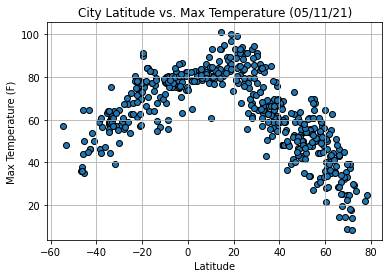

In [10]:
# Create scatter plot for Latitude vs. Temperature
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor = 'Black')
plt.title('City Latitude vs. Max Temperature (05/11/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(linestyle = '-')

# Save Plot
plt.savefig('../output_data/lat_temp_plot')

Plot shows that temperatures lower as you move further from the equater.

## Latitude vs. Humidity Plot

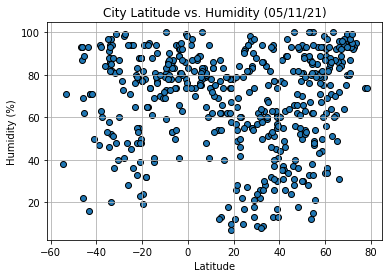

In [11]:
# Create scatter plot for Latitude vs. Humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor = 'black')
plt.title('City Latitude vs. Humidity (05/11/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle = '-')

# Save Plot
plt.savefig('../output_data/lat_humidity_plot')

There is no correlation for a cities latitude vs humidity.

## Latitude vs. Cloudiness Plot

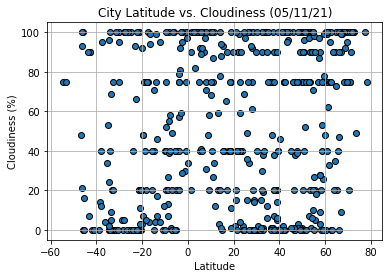

In [12]:
# Create scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor = 'black')
plt.title('City Latitude vs. Cloudiness (05/11/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle = '-')

# Save Plot
plt.savefig('../output_data/lat_cloudiness_plot')

There is no correlation for a cities latitude vs cloudiness.

## Latitude vs. Wind Speed Plot

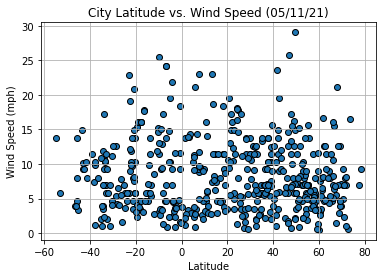

In [13]:
# Create scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolor = 'black')
plt.title('City Latitude vs. Wind Speed (05/11/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(linestyle = '-')

# Save Plot
plt.savefig('../output_data/lat_windspeed_plot')

There is no correlation for a cities latitude vs windspeed. Most cities on 5/11/21 were below 15 mph.

## Linear Regression

In [14]:
# Create Data Frame for Northern and Southern 
northern = weather_df.loc[weather_df['Lat'] >= 0, :]
southern = weather_df.loc[weather_df['Lat'] < 0, :]
# northern['Lat'].count()
# southern['Lat'].count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8553260936205382


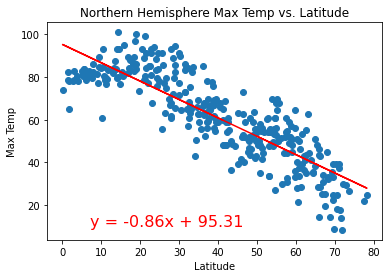

In [24]:
# Linear Regression for Northern Hemisphere Max Temp vs. Latitude
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (7,10), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/north_maxtemp_lat_plot')

There is a very strong negative correlation between max temperature and latitude. As the cities move closers to the equater the temperatures are higher.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7729793198898096


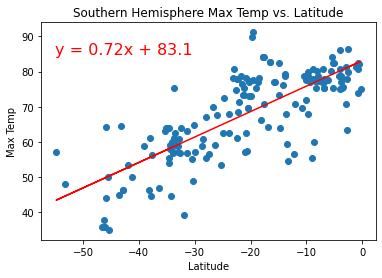

In [16]:
# Linear Regression for Southern Hemisphere Max Temp vs. Latitude
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (-55,85), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/south_maxtemp_lat_plot')

There is a strong positive correlation between max temperature and latitude. As the cities move closers to the equater the temperatures are higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14048120432740677


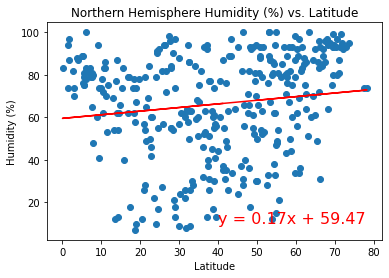

In [17]:
# Linear Regression for Northern Hemisphere Humidity (%) vs. Latitude
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (40,10), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/north_humidity_lat_plot')

There is a very weak positive correlation between humidity and the latitude of a city in the northern hemisphere. Which means there is no correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1531430667003338


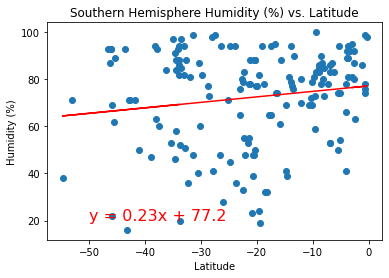

In [18]:
# Linear Regression for Southern Hemisphere Humidity (%) vs. Latitude
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (-50,20), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/south_humidity_lat_plot')

There is a very weak positive correlation between humidity and the latitude of a city in the southern hemisphere. Which means there is no correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0572706675723738


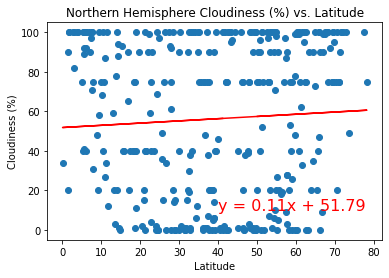

In [19]:
# Linear Regression for Northern Hemisphere Cloudiness (%) vs. Latitude
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (40,10), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/north_cloudiness_lat_plot')

There is a very weak positive correlation between cloudiness and the latitude of a city in the northern hemisphere. Which means there is no correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12574166658603034


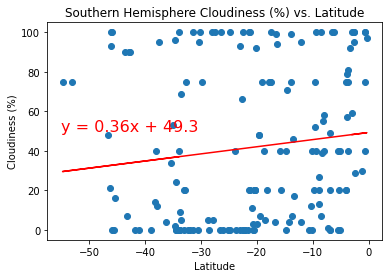

In [20]:
# Linear Regression for Southern Hemisphere Cloudiness (%) vs. Latitude
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (-55,50), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/south_cloudiness_lat_plot')

There is a very weak positive correlation between cloudiness and the latitude of a city in the southern hemisphere. Which means there is no correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09333715791688756


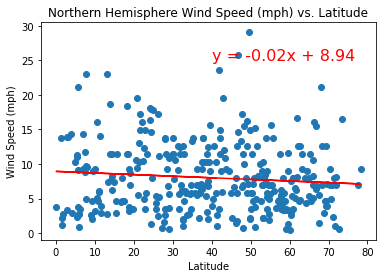

In [21]:
# Linear Regression for Northern Hemisphere Cloudiness (%) vs. Latitude
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (40,25), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/north_windspeed_lat_plot')

There is no correlation between wind speed vs the cities latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06585261064064891


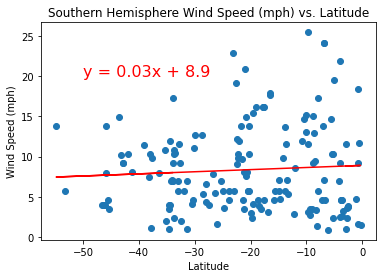

In [22]:
# Linear Regression for Southern Hemisphere Cloudiness (%) vs. Latitude
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Plot linear regression
plt.plot((x_values),regress_values,"r-")
plt.annotate(line_eq, (-50,20), fontsize = 16, color = 'r')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save Plot
plt.savefig('../output_data/south_windspeed_lat_plot')

There is no correlation between wind speed vs the cities latitude in the southern hemisphere